# Predicting Success of Movies

by: Accever Mendoza

## Executive Summary

This paper aims to look at CSM (Conventional and Social Media Movies) Dataset 2014 and 2015 and be able to predict ratings and gross income of movies. Regression models were used and the features were also separated. The model with the best accuracy is chosen and for this case, the ratings had 13.3% maximum test accuracy and gross income had 51.55% test accuracy.

## Data Description

There are 12 features categorized as conventional and social media features. Both conventional features, collected from movies databases on Web as well as social media features (Youtube, Twitter). Descriptions are from the paper cited.

* Genre: 19 values of Genre such as Action, Adventure and Drama etc. are used. Each nominal value of genre was mapped onto numeric value from 1-19 in order to improve the performance of learning algorithms.

* Sequel: The value represents whether the movie is sequel or an individual. It is a numeric number that ranges from 1 to N. 1 shows that movie is first release (no sequel), whereas 2 represents that the movie is 2nd in a sequel; E.g. Pirates of Caribbean: Dead Man’s Chest is 2nd in sequel, therefore it is assigned the value of 2.

* Ratings: The value of Ratings ranges between 1 to 10 with 1 being lowest and 10 the highest. These values are collected from IMDB.

* Gross Income, Budget and Number of Screens: Gross world-wide income and Budget for each movie is collected from IMDB. The values are converted into USD (if available in other currencies). Number of screens on which movie was initially launched in US is also considered.

* Aggregate Actor Followers: Number of followers on twitter is used. Initially, we considered only the top actor; however, the data got too sparse as there are many actors who do not have twitter account, therefore, we used the followers count of top 3 cast.

* Number of Views and Comments: The number of views and comments of trailer of movies on YouTube are calculated.

* Number of likes and dislikes: Similar to the number of views and counts, number of Likes and Dislikes of trailers on YouTube are considered.

* Sentiment Score: This feature is represented by signed integer value. 0 represents neutral sentiment, “+”sign shows the positive sentiment whereas number shows the magnitude. Similarly “–”sign shows negative sentiment. Sentiment score is calculated by retrieving all tweets related to each movie, assigning the sentiment score to each of them and then aggregating the score.

## Exploratory Data Analysis and Pre-processing

We take a look at the movies dataset. First we change the index to the Movie titles. Then we take a look at the distribution of the dataset in terms of Genre, Year and Ratings. Afterwards, we look at the data type of each of the feature. Then we now have to clean the data.

We first look at the number of NaN values. Using the Imputer from sklearn, we impute missing values using the mean.

In [1]:
import pandas as pd

df = pd.read_excel('2014 and 2015 CSM dataset.xlsx')
df.set_index(['Movie'], inplace=True)
df.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Movie,,,,,,,,,,,,,
13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [2]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Ratings'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Ratings']
df_state.plot(kind='bar')

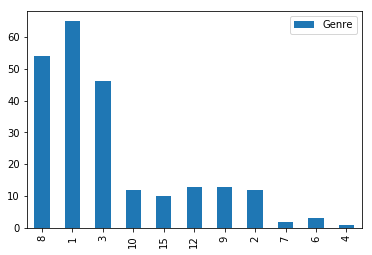

In [3]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Genre'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Genre']
df_state.plot(kind='bar')

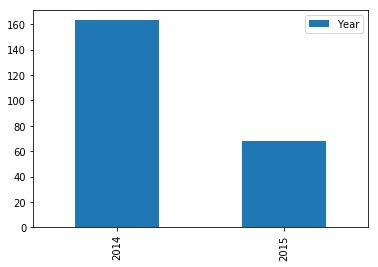

In [4]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Year'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Year']
df_state.plot(kind='bar')

In [5]:
df.dtypes

Year                     int64
Ratings                float64
Genre                    int64
Gross                    int64
Budget                 float64
Screens                float64
Sequel                   int64
Sentiment                int64
Views                    int64
Likes                    int64
Dislikes                 int64
Comments                 int64
Aggregate Followers    float64
dtype: object

In [6]:
df.isnull().sum()

Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [7]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
df.iloc[:,:] = imr.transform(df)
df.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Movie,,,,,,,,,,,,,
13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0
300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0


In [8]:
df.isnull().sum()

Year                   0
Ratings                0
Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
dtype: int64

## Models

We take a look at certain models namely the kNN regression, linear regression, Lasso regression and Ridge regression. We use a certain automated system shared in our class to determine the test accuracy for Ratings and Gross Income separately.

We vary the hyperparameters for kNN regression (k-nearest neighbor) and regularization(C) for Ridge and Lasso regression to determine the best model. 

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

class JudasBase():
    
    def annotation(self, ax, text, max_index, max_score, textdirection='north', 
                   textdistance=2, horizontalalignment='left', log=False):
        ymin, ymax = ax.get_ylim()
        xmin, xmax = ax.get_xlim()
        #print('xmax: {}\nxmin: {}\nmaxindex: {}'.format(xmax,xmin,max_index))
        if log:
            offset_x = lambda x: np.e**(np.log10(max_index)+
                        (x*textdistance*(np.log10(xmax)-np.log10(xmin))/10))
        else:
            offset_x = lambda x: max_index + x*textdistance*(xmax-xmin)/10 
            
        offset_y = textdistance*(ymax-ymin)/10
        max_loc = (max_index, max_score)
        if textdirection == 'north':
            xytext = (max_index, max_score + offset_y)
        elif textdirection == 'northeast':
            xytext = (offset_x(1), max_score + offset_y)
        elif textdirection == 'east':
            xytext = (offset_x(1), max_score)
        elif textdirection == 'southeast':
            xytext = (offset_x(1), max_score - offset_y)
        elif textdirection == 'south':
            xytext = (max_index, max_score - offset_y)
        elif textdirection == 'southwest':
            xytext = (offset_x(-1), max_score - offset_y)
        elif textdirection == 'west':
            xytext = (offset_x(-1), max_score)
        elif textdirection == 'northwest':
            xytext = (offset_x(-1), max_score + offset_y)

        ax.annotate(text, 
                xy=max_loc, xytext=xytext,
                arrowprops=dict(facecolor='black', shrink=1),
                horizontalalignment=horizontalalignment)
        return ax
    
class TrainKNN(JudasBase):
    score_train = []
    score_test = []
    neighbors_settings = range(1,2)
    
    def __init__(self, X, y, knntype='regression', neighbors_settings=range(1,70),
                 number_trials=50, test_size=0.25):
        score_train = []
        score_test = []
        self.knntype = knntype
        self.neighbors_settings = neighbors_settings
        self.number_trials = number_trials

        for seed in range(number_trials):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

            acc_train = []
            acc_test = []

            for n_neighbors in self.neighbors_settings:   
                if knntype == 'regression':
                    clf = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
                elif knntype == 'classification':
                    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
                clf.fit(X_train, y_train)    
                acc_train.append(clf.score(X_train, y_train))
                acc_test.append(clf.score(X_test, y_test))

            score_train.append(acc_train)
            score_test.append(acc_test)  
        
        self.score_train = score_train
        self.score_test = score_test
        return

    def score(self):
        score = np.mean(self.score_test, axis=0)
        return ['kNN {}'.format(self.knntype), np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA']

    def plot(self, figsize=(8,6), annotation=True, horizontalalignment='left',
             textdirection='north', textdistance=2):
        df = pd.DataFrame({'train': np.mean(self.score_train, axis=0),
                           'test': np.mean(self.score_test, axis=0)},
                            index=self.neighbors_settings)
        ax = df.plot(figsize=figsize)
    
        score = np.mean(self.score_test, axis=0)
        max_score = np.amax(score)
        max_index = np.argmax(score)
        if annotation:
            text = 'Test Set\noptimal neighbor size: {}\naccuracy: {:.2%}'.\
                    format(self.neighbors_settings[max_index], max_score)
            ax = self.annotation(ax, text, self.neighbors_settings[max_index], max_score, 
                                 textdirection, textdistance, horizontalalignment)
        ax.set_title('KNN {} Model ({} samples)'.format(self.knntype, self.number_trials))
        ax.set_xlabel('neighbors')
        ax.set_ylabel('accuracy')
        #ax.set_xticks(self.neighbors_settings)
        return ax
    
class TrainClassification(JudasBase):
    score_train = []
    score_test = []
    weighted_coefs = []
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    
    def __init__(self, X, y, model, reg, number_trials=50, test_size=0.25, C=None):
        
        if C is not None:
            self.C = C
        if model == 'logistic':
            #clf = LogisticRegression()
            self.modelname = 'Logistic Regression Model'
        elif model == 'svm':
            #clf = LinearSVC()
            self.modelname = 'SVM Model'
        else:
            return 'Invalid model'
        self.number_trials = number_trials
        self.reg = reg
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(number_trials):
            training_accuracy = []  
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
            for alpha_run in self.C:
                #clf.C = alpha_run
                #clf.penalty = reg
                if model == 'logistic':
                    clf = LogisticRegression(C=alpha_run, penalty=reg).fit(X_train, y_train)
                elif model == 'svm':
                    if reg == 'l1':
                        clf = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge',\
                                        dual=False).fit(X_train, y_train)
                    elif reg == 'l2':
                        clf = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
                    else:
                        return 'Invalid regularization'
                #model = clf.fit(X_train, y_train)
                training_accuracy.append(clf.score(X_train, y_train))
                test_accuracy.append(clf.score(X_test, y_test))
                if alpha_run == 0.01:
                    coefs=clf.coef_ 
                    weighted_coefs.append(coefs) #append all the computed coefficients per trial

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)
    
        #get the mean of the weighted coefficients over all the trials 
        self.weighted_coefs = np.mean(weighted_coefs, axis=0) 
        self.score_train = score_train
        self.score_test = score_test
        return

    def score(self):
        score = np.mean(self.score_test, axis=0)
        top_predictor=[X.columns[np.argmax(np.abs(i))] for i in self.weighted_coefs]
        return ['{} ({})'.format(self.modelname, self.reg.upper()), np.amax(score), \
            'C = {0}'.format(self.C[np.argmax(score)]), top_predictor]

    def plot(self, figsize=(8,6), annotation=True, horizontalalignment='left',
             textdirection='north', textdistance=2):
        df = pd.DataFrame({'train': np.mean(self.score_train, axis=0),
                           'test': np.mean(self.score_test, axis=0)},
                            index=self.C)
        ax = df.plot(figsize=figsize)
        ax.set_xscale('log')
    
        score = np.mean(self.score_test, axis=0)
        max_score = np.amax(score)
        max_index = np.argmax(score)
        max_loc = (max_index, max_score)
        if annotation:
            text = 'Test Set\noptimal C: {}\naccuracy: {:.2%}'.\
                        format(self.C[max_index], max_score)
            ax = self.annotation(ax, text, self.C[max_index], max_score, textdirection, 
                                 textdistance, horizontalalignment, log=True)
        ax.set_title('''{} ({} regularization, {} samples)'''\
                     .format(self.modelname, self.reg.upper(), self.number_trials))
        ax.set_xlabel('C parameter')
        ax.set_ylabel('accuracy')
        #ax.set_xticks(self.C)
        return ax
    
class TrainRegression(JudasBase):
    score_train = []
    score_test = []
    weighted_coefs = []
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    
    def __init__(self, X, y, model, number_trials=50, test_size=0.25, C=None):
        
        if C is not None:
            self.C = C
        if model == 'linear':
            self.modelname = 'Linear Regression Model'
        elif model == 'ridge':
            self.modelname = 'Ridge Regression Model'
        elif model == 'lasso':
            self.modelname = 'Lasso Regression Model'
        else:
            return 'Invalid model'
        self.number_trials = number_trials
        self.model = model
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(number_trials):
            training_accuracy = []  
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
            if model == 'linear':
                clf = LinearRegression().fit(X_train, y_train)
                training_accuracy.append(clf.score(X_train, y_train))
                test_accuracy.append(clf.score(X_test, y_test))
                coefs=clf.coef_ 
                weighted_coefs.append(coefs) #append all the computed coefficients per trial
            else:
                for alpha_run in self.C:
                    if model == 'ridge':
                        clf = Ridge(alpha=alpha_run).fit(X_train, y_train)
                    elif model == 'lasso':
                        clf = Lasso(alpha=alpha_run).fit(X_train, y_train)

                    training_accuracy.append(clf.score(X_train, y_train))
                    test_accuracy.append(clf.score(X_test, y_test))
                    if alpha_run == 0.01:
                        coefs=clf.coef_ 
                        weighted_coefs.append(coefs) #append all the computed coefficients per trial

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)
    
        #get the mean of the weighted coefficients over all the trials 
        self.weighted_coefs = np.mean(weighted_coefs, axis=0) 
        self.score_train = score_train
        self.score_test = score_test
        return

    def score(self):
        score = np.mean(self.score_test, axis=0)
        top_predictor=X.columns[np.argmax(np.abs(self.weighted_coefs))]
        if self.model == 'linear':
            return ['{}'.format(self.modelname), np.amax(score), \
                'NA', top_predictor]
        return ['{}'.format(self.modelname), np.amax(score), \
            'alpha = {0}'.format(self.C[np.argmax(score)]), top_predictor]

    def plot(self, figsize=(8,6), annotation=True, horizontalalignment='left',
             textdirection='north', textdistance=2):
        if self.model=='linear':
            return 'no plot for linear'
        df = pd.DataFrame({'train': np.mean(self.score_train, axis=0),
                           'test': np.mean(self.score_test, axis=0)},
                            index=self.C)
        ax = df.plot(figsize=figsize)
        ax.set_xscale('log')
    
        score = np.mean(self.score_test, axis=0)
        max_score = np.amax(score)
        max_index = np.argmax(score)
        max_loc = (max_index, max_score)
        if annotation:
            text = 'Test Set\noptimal C: {}\naccuracy: {:.2%}'.\
                        format(self.C[max_index], max_score)
            ax = self.annotation(ax, text, self.C[max_index], max_score, textdirection, 
                                 textdistance, horizontalalignment, log=True)
        ax.set_title('''{} ({} samples)'''\
                     .format(self.modelname, self.number_trials))
        ax.set_xlabel('C parameter')
        ax.set_ylabel('accuracy')
        #ax.set_xticks(self.C)
        return ax
    
import time
from datetime import timedelta

class Train():
    results = []
    models = []
    def automate(self, X, y, models):
        self.models = []
        for model in models:
            start_time = time.time()
            if model[0] == 'knn-classifier':
                m = TrainKNN(X,y,'classification',model[1],model[2])
            elif model[0] == 'logistic-regression':
                m = TrainClassification(X,y,model='logistic', reg=model[1], number_trials=model[2])
            elif model[0] == 'svm':
                m = TrainClassification(X,y,model='svm', reg=model[1], number_trials=model[2])
            elif model[0] == 'knn-regression':
                m = TrainKNN(X,y,'regression',model[1],model[2])
            elif model[0] == 'linear-regression':
                m = TrainRegression(X,y,'linear', number_trials=model[1])
            elif model[0] == 'ridge-regression':
                m = TrainRegression(X,y,'ridge', number_trials=model[1])
            elif model[0] == 'lasso-regression':
                m = TrainRegression(X,y,'lasso', number_trials=model[1])
            else:
                continue
            elapsed_time_secs = time.time() - start_time
            print('{} execution time: {}'.format(model[0], timedelta(seconds=round(elapsed_time_secs))))
            self.models.append(m)
    def score(self):
        cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable']
        df = pd.DataFrame(columns=cols)
        for idx, m in enumerate(self.models):
            if DEBUG == True:
                print(idx)
            df.loc[idx] = m.score()
        return df

In [10]:
X = df.drop('Ratings', axis=1)
y = df['Ratings']

In [11]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:00
CPU times: user 1.94 s, sys: 24 ms, total: 1.97 s
Wall time: 1.72 s


In [12]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.088104,N_Neighbor = 13,NA
1,Linear Regression Model,0.034981,NA,Sequel
2,Ridge Regression Model,0.065132,alpha = 5000,Sequel
3,Lasso Regression Model,0.130738,alpha = 100,Sequel


In [13]:
X = df.drop(['Gross', 'Ratings'], axis=1)
y = df['Gross']

In [14]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:01
CPU times: user 2.17 s, sys: 22.4 ms, total: 2.2 s
Wall time: 1.96 s


In [15]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.466170,N_Neighbor = 18,NA
1,Linear Regression Model,0.439157,NA,Sequel
2,Ridge Regression Model,0.476889,alpha = 5000,Sequel
3,Lasso Regression Model,0.439255,alpha = 5000,Sequel


* As suggested in the paper cited below, we now try to look at conventional features and social media features separately to see if the regression accuracy will improve. We have df1 for the conventional features and df2 for the social media features.

In [16]:
df1 = df.iloc[:,:7]
df1.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel
Movie,,,,,,,
13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0
22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0
3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0
300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0
A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0


In [17]:
df2 = df.drop(['Year', 'Genre', 'Budget','Screens','Sequel'], axis=1)
df2.head()

,Ratings,Gross,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Movie,,,,,,,,
13 Sins,6.3,9130.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
22 Jump Street,7.1,192000000.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
3 Days to Kill,6.2,30700000.0,0.0,304861.0,328.0,34.0,47.0,483000.0
300: Rise of an Empire,6.3,106000000.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
A Haunted House 2,4.7,17300000.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0


In [18]:
X = df1.drop('Ratings', axis=1)
y = df1['Ratings']

In [19]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:00
CPU times: user 1.83 s, sys: 32 ms, total: 1.86 s
Wall time: 1.62 s


In [20]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.096766,N_Neighbor = 9,NA
1,Linear Regression Model,0.079115,NA,Sequel
2,Ridge Regression Model,0.102828,alpha = 5000,Sequel
3,Lasso Regression Model,0.105762,alpha = 0.4,Sequel


In [21]:
X = df1.drop(['Gross', 'Ratings'], axis=1)
y = df1['Gross']

In [22]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:00
CPU times: user 1.81 s, sys: 27.3 ms, total: 1.84 s
Wall time: 1.6 s


In [23]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.448374,N_Neighbor = 19,NA
1,Linear Regression Model,0.489751,NA,Sequel
2,Ridge Regression Model,0.515505,alpha = 5000,Sequel
3,Lasso Regression Model,0.489795,alpha = 5000,Sequel


In [24]:
X = df2.drop(['Gross', 'Ratings'], axis=1)
y = df2['Gross']

In [25]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:01
CPU times: user 2.08 s, sys: 32.7 ms, total: 2.11 s
Wall time: 1.88 s


In [26]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.027025,N_Neighbor = 13,NA
1,Linear Regression Model,-0.227840,NA,Sentiment
2,Ridge Regression Model,-0.220688,alpha = 5000,Sentiment
3,Lasso Regression Model,-0.227837,alpha = 5000,Sentiment


In [27]:
X = df2.drop('Ratings', axis=1)
y = df2['Ratings']

In [28]:
%%time

import warnings
warnings.filterwarnings("ignore")

# Tuple elements for models 1-6:
# first - model
# second - neighbors/penalty
# third - # of seeds
# Tuple elements for models 7-9:
# first - model
# second - # of seeds

DEBUG = False
inp = [
#     ('knn-classifier', range(1,20), 20),
#     ('logistic-regression', 'l1', 20),
#     ('logistic-regression', 'l2', 20),
#     ('svm', 'l1', 20),
#     ('svm', 'l2', 20),
    ('knn-regression', range(1,20), 20),
    ('linear-regression', 20),
    ('ridge-regression', 20),
    ('lasso-regression', 20),
]
judas = Train()
judas.automate(X,y,inp)

knn-regression execution time: 0:00:01
linear-regression execution time: 0:00:00
ridge-regression execution time: 0:00:00
lasso-regression execution time: 0:00:00
CPU times: user 2.28 s, sys: 52.8 ms, total: 2.33 s
Wall time: 2.12 s


In [29]:
 judas.score()

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN regression,0.099940,N_Neighbor = 18,NA
1,Linear Regression Model,0.043924,NA,Sentiment
2,Ridge Regression Model,0.044750,alpha = 1000,Sentiment
3,Lasso Regression Model,0.133082,alpha = 100,Sentiment


## Results

From the results above, it was worth giving a shot at looking into the conventional features and social media features separately. The best predictor for the Ratings is having social media features using Lasso regression model it is at a maximum of 13.3% accuracy with alpha = 100. In the case of Gross Income, using the conventional features with the Ridge regression model would give us a test accuracy of 51.55% with alpha = 5000.

The values of the predictor are quite low and it would be good to still look at other models like the decision tree.

## Citations

* Thanks to Jude Teves for the JUDAS model.
* Joseph Bunao
* M. Ahmed et al, Using Crowd-source based features from social media and Conventional features to predict the movies popularity (2015)